In [63]:
import tensorflow
from tensorflow.keras.datasets.cifar10 import load_data # CIFAR 10 dataset
from matplotlib import pyplot

In [64]:
# load data
(trainX, trainY), (testX, testY) = load_data()

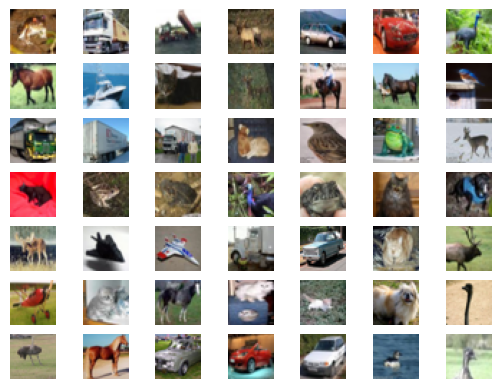

In [65]:
# show original images
for i in range(49):
    pyplot.subplot(7, 7, i+1)
    pyplot.axis('off')
    pyplot.imshow(trainX[i])
pyplot.show()

In [66]:
print(trainX.shape)

(50000, 32, 32, 3)


In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, LeakyReLU
from tensorflow.keras.utils import plot_model
import numpy as np

In [68]:
# DISCRIMINATOR

def define_discriminator(input_shape=(32, 32, 3)):
    # sequential model
    model=Sequential()
    # conv layer
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=input_shape))
    model.add(LeakyReLU(alpha=0.2))
    # downsample
    model.add(Conv2D(128, (3, 3), padding='same', strides=(2, 2)))
    model.add(LeakyReLU(alpha=0.2))
    # downsample
    model.add(Conv2D(128, (3, 3), padding='same', strides=(2, 2)))
    model.add(LeakyReLU(alpha=0.2))
    # downsample
    model.add(Conv2D(256, (3, 3), padding='same', strides=(2, 2)))
    model.add(LeakyReLU(alpha=0.2))
    # classifier
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    optimizer=Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [69]:
# discriminator model
model=define_discriminator()

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_32 (LeakyReLU)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_33 (LeakyReLU)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_34 (LeakyReLU)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_35 (LeakyReLU)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │           4,097 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 522,497 (1.99 MB)

 Trainable params: 522,497 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

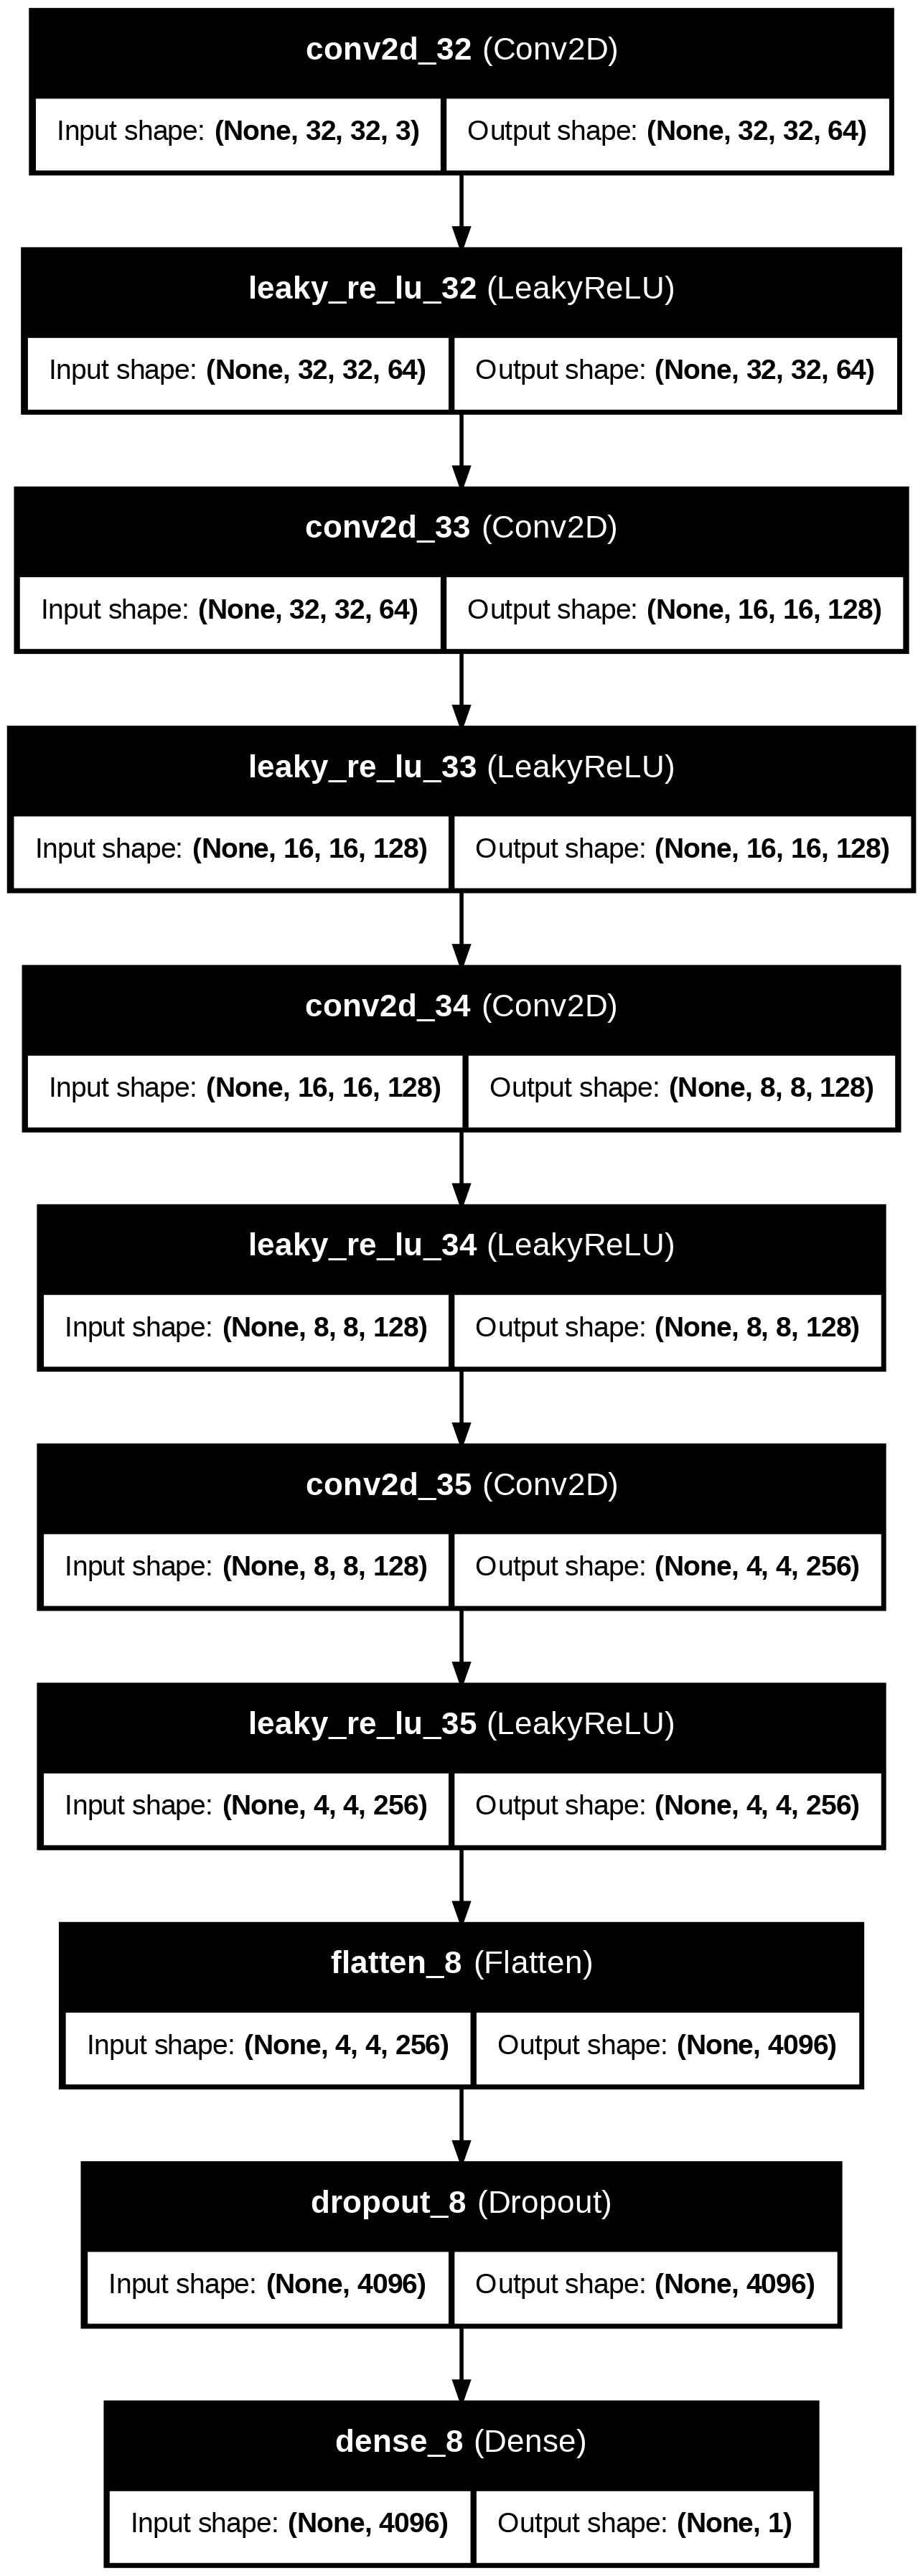

In [70]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [71]:
# load original images
def load_real_samples():
    (trainX, _), (_, _) = load_data() # only train data
    X=trainX.astype('float32')
    X=(X-127.5)/127.5 # scaling between -1 and 1
    return X

In [72]:
X=load_real_samples()

In [73]:
X.shape

(50000, 32, 32, 3)

In [74]:
X[0]

array([[[-0.5372549 , -0.5137255 , -0.5058824 ],
        [-0.6627451 , -0.6392157 , -0.64705884],
        [-0.60784316, -0.62352943, -0.6627451 ],
        ...,
        [ 0.23921569,  0.03529412, -0.15294118],
        [ 0.19215687, -0.01960784, -0.2       ],
        [ 0.16078432, -0.02745098, -0.19215687]],

       [[-0.8745098 , -0.84313726, -0.84313726],
        [-1.        , -1.        , -1.        ],
        [-0.85882354, -0.9372549 , -1.        ],
        ...,
        [-0.03529412, -0.30980393, -0.5686275 ],
        [-0.06666667, -0.34901962, -0.60784316],
        [-0.04313726, -0.31764707, -0.5529412 ]],

       [[-0.8039216 , -0.8117647 , -0.8352941 ],
        [-0.8745098 , -0.94509804, -1.        ],
        [-0.6156863 , -0.7882353 , -0.9372549 ],
        ...,
        [-0.07450981, -0.34117648, -0.60784316],
        [-0.05882353, -0.34117648, -0.60784316],
        [-0.14509805, -0.42745098, -0.67058825]],

       ...,

       [[ 0.6313726 ,  0.33333334, -0.24705882],
        [ 0

In [75]:
# select original images in batches
def generate_real_samples(dataset, n_samples):
    # choose random samples
    ix=np.random.randint(0, dataset.shape[0], n_samples)
    X=dataset[ix]
    y=np.ones((n_samples, 1))
    return X, y

In [76]:
X, y = generate_real_samples(X, 64)
print(X.shape)
print(y.shape)

(64, 32, 32, 3)
(64, 1)


In [77]:
y

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [78]:
# generate fake images
def generate_fake_samples(n_samples):
    # random numbers in pixel values
    X=np.random.rand(32*32*3*n_samples)
    X=-1+X*2
    X=X.reshape((n_samples, 32, 32, 3))
    y=np.zeros((n_samples, 1))
    return X, y

In [79]:
X, y = generate_fake_samples(64)
print(X.shape)
print(y.shape)

(64, 32, 32, 3)
(64, 1)


In [80]:
y

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

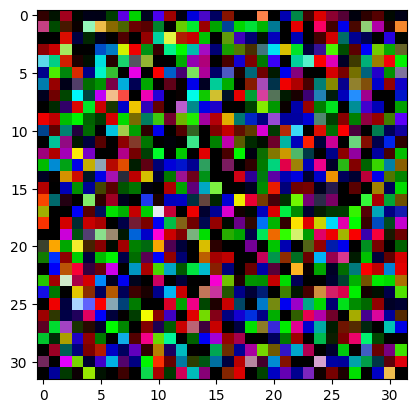

In [81]:
pyplot.imshow(X[0]) # noise image

In [82]:
# train discriminator
def train_discriminator(model, dataset, n_iter=20, n_batch=128):
    half_batch=int(n_batch/2)
    for i in range(n_iter):
        # real images shown
        X_real, y_real = generate_real_samples(dataset, half_batch)
        _, real_acc = model.train_on_batch(X_real, y_real)
        # fake images shown
        X_fake, y_fake = generate_fake_samples(half_batch)
        _, fake_acc = model.train_on_batch(X_fake, y_fake)
        print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

In [83]:
# example discriminator training
model = define_discriminator()
dataset = load_real_samples()
train_discriminator(model, dataset)

>1 real=80% fake=40%
>2 real=59% fake=46%
>3 real=57% fake=50%
>4 real=57% fake=56%
>5 real=61% fake=64%
>6 real=67% fake=70%
>7 real=72% fake=74%
>8 real=76% fake=77%
>9 real=78% fake=79%
>10 real=80% fake=81%
>11 real=82% fake=83%
>12 real=83% fake=84%
>13 real=85% fake=85%
>14 real=86% fake=86%
>15 real=86% fake=87%
>16 real=87% fake=88%
>17 real=88% fake=88%
>18 real=89% fake=89%
>19 real=89% fake=90%
>20 real=90% fake=90%


In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Conv2D, Conv2DTranspose, LeakyReLU
from tensorflow.keras.utils import plot_model

In [85]:
# GENERATOR

def define_generator(latent_dim):
    # sequential model
    model=Sequential()
    # base image
    n_nodes=256*4*4
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((4, 4, 256)))
    # upsample to 8x8
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # upsample to 16x16
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # upsample to 32x32
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # output layer
    model.add(Conv2D(3, (3, 3), activation='tanh', padding='same'))
    return model

In [86]:
latent_dim = 100
model = define_generator(latent_dim)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 4096)                │         413,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_40 (LeakyReLU)           │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 8, 8, 128)           │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_41 (LeakyReLU)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 16, 16, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_42 (LeakyReLU)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 32, 32, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_43 (LeakyReLU)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 32, 32, 3)           │           3,459 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,466,115 (5.59 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 0 (0.00 B)

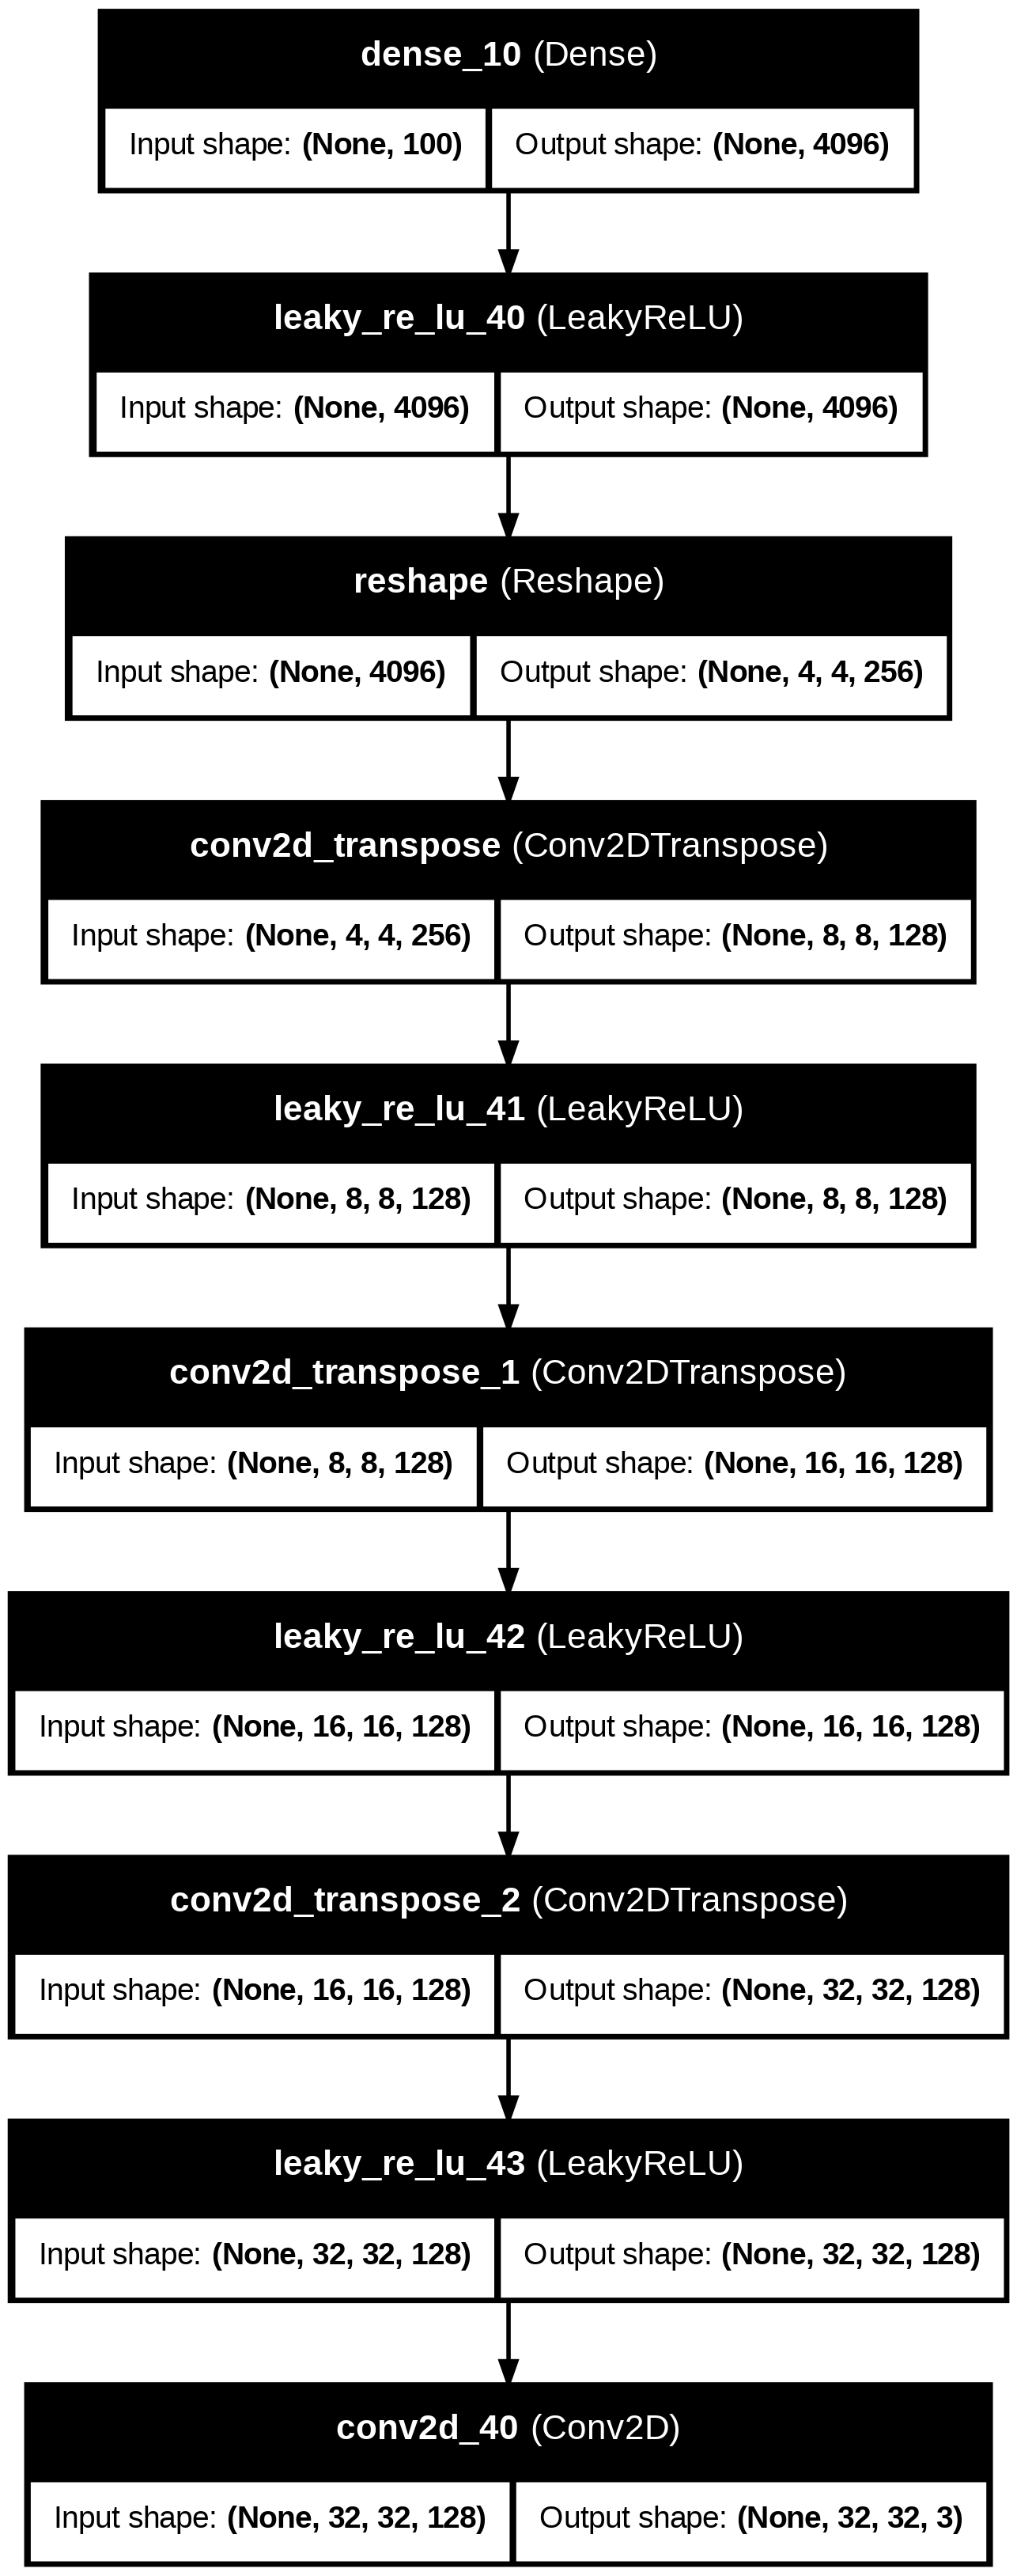

In [87]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [88]:
# generate input points for generator
def generate_latent_points(latent_dim, n_samples):
    x_input=np.random.randn(latent_dim*n_samples)
    x_input=x_input.reshape(n_samples, latent_dim)
    return x_input

In [89]:
x_input=generate_latent_points(100, 64)
print(x_input.shape)

(64, 100)


In [91]:
# generate fake data using generator
def generate_fake_samples(g_model, latent_dim, n_samples):
    x_input=generate_latent_points(latent_dim, n_samples) # noise
    X=g_model.predict(x_input) # images generated by generator from noise input
    y=np.zeros((n_samples, 1))
    return X, y

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


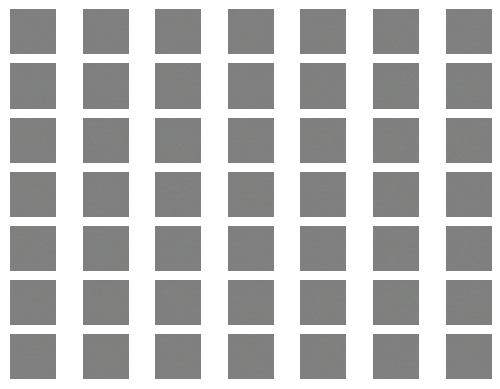

In [93]:
# example fake samples from generator
latent_dim=100
model=define_generator(latent_dim)
n_samples=49
X, _ = generate_fake_samples(model, latent_dim, n_samples)
X=(X+1)/2.0

# images generated before training
for i in range(n_samples):
    pyplot.subplot(7, 7, i+1)
    pyplot.axis('off')
    pyplot.imshow(X[i])

pyplot.show()

In [94]:
# GAN Model

def define_gan(g_model, d_model):
    d_model.trainable=False # freeze discriminator in combined model
    model=Sequential()
    # connect generator to discriminator
    model.add(g_model)
    model.add(d_model)
    optimizer=Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=optimizer)
    return model

In [95]:
latent_dim=100
d_model=define_discriminator()
g_model=define_generator(latent_dim)
gan_model=define_gan(g_model, d_model)
gan_model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_14 (Sequential)           │ (None, 32, 32, 3)           │       1,466,115 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_13 (Sequential)           │ (None, 1)                   │         522,497 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,988,612 (7.59 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 522,497 (1.99 MB)

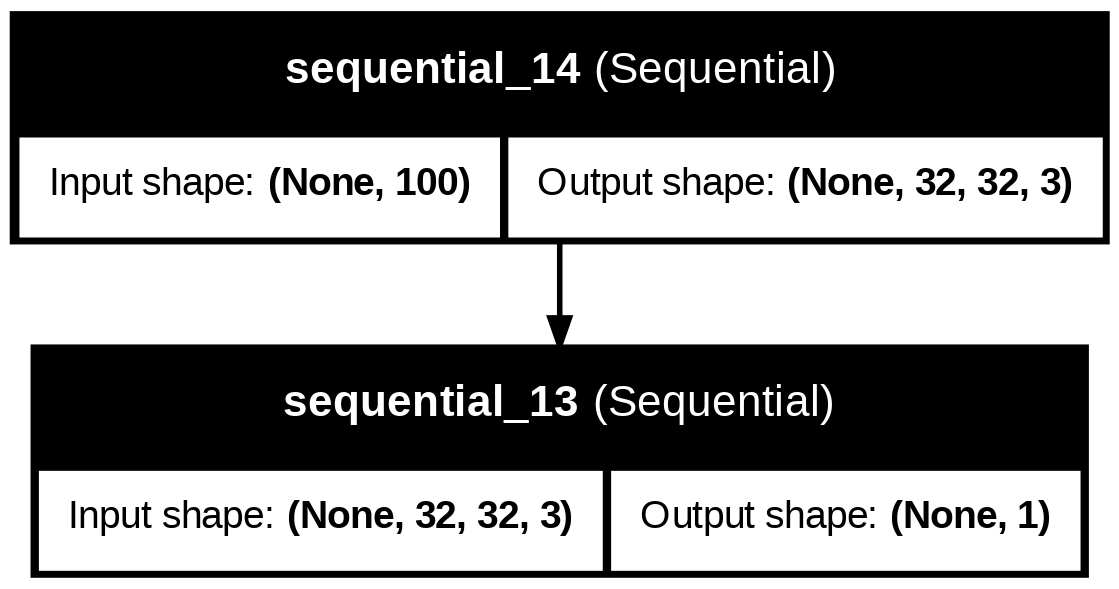

In [96]:
plot_model(gan_model, show_shapes=True, show_layer_names=True)

In [126]:
# model training
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=200, n_batch=128):
    batch_per_epoch=int(dataset.shape[0]/n_batch)
    half_batch=int(n_batch/2)
    # training process
    for i in range(n_epochs):
        for j in range(batch_per_epoch):
            # real samples
            X_real, y_real=generate_real_samples(dataset, half_batch)
            # update discriminator weights
            d_loss1, _ = d_model.train_on_batch(X_real, y_real)
            # generate fake samples
            X_fake, y_fake=generate_fake_samples(g_model, latent_dim, half_batch)
            # update discriminator weights
            d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
            # input for generator
            X_gan=generate_latent_points(latent_dim, n_batch)
            y_gan=np.ones((n_batch, 1))
            # update generator weights
            g_loss=gan_model.train_on_batch(X_gan, y_gan)
            # loss summary
            #print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' % (i+1, j+1, batch_per_epoch, float(d_loss1), float(d_loss2), float(g_loss)))
        # summarize performance every 10 epochs
        if (i+1)%10==0:
            summarize_performance(i, g_model, d_model, dataset, latent_dim)

In [127]:
# summarize performance
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=150):
    X_real, y_real=generate_real_samples(dataset, n_samples)
    _, acc_real=d_model.evaluate(X_real, y_real, verbose=0)
    x_fake, y_fake=generate_fake_samples(g_model, latent_dim, n_samples)
    _, acc_fake=d_model.evaluate(x_fake, y_fake, verbose=0)
    print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
    save_plot(x_fake, epoch)

In [128]:
# save plot
def save_plot(examples, epoch, n=7):
    examples=(examples+1)/2.0
    for i in range(n*n):
        pyplot.subplot(n, n, i+1)
        pyplot.axis('off')
        pyplot.imshow(examples[i])
    pyplot.close()

In [ ]:
train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=50, n_batch=128)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━